<a href="https://colab.research.google.com/github/Anshu-Rajpoot/Time-Series-Analysis/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
df.shape

(847, 2)

In [ ]:
print(f"Data range of gold prices available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]} ")

Data range of gold prices available from : 1950-01 to 2020-07 


In [ ]:
date = pd.date_range(start ='1/1/1950', end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [ ]:
df['month']=date
df.drop('Date',axis=1, inplace = True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


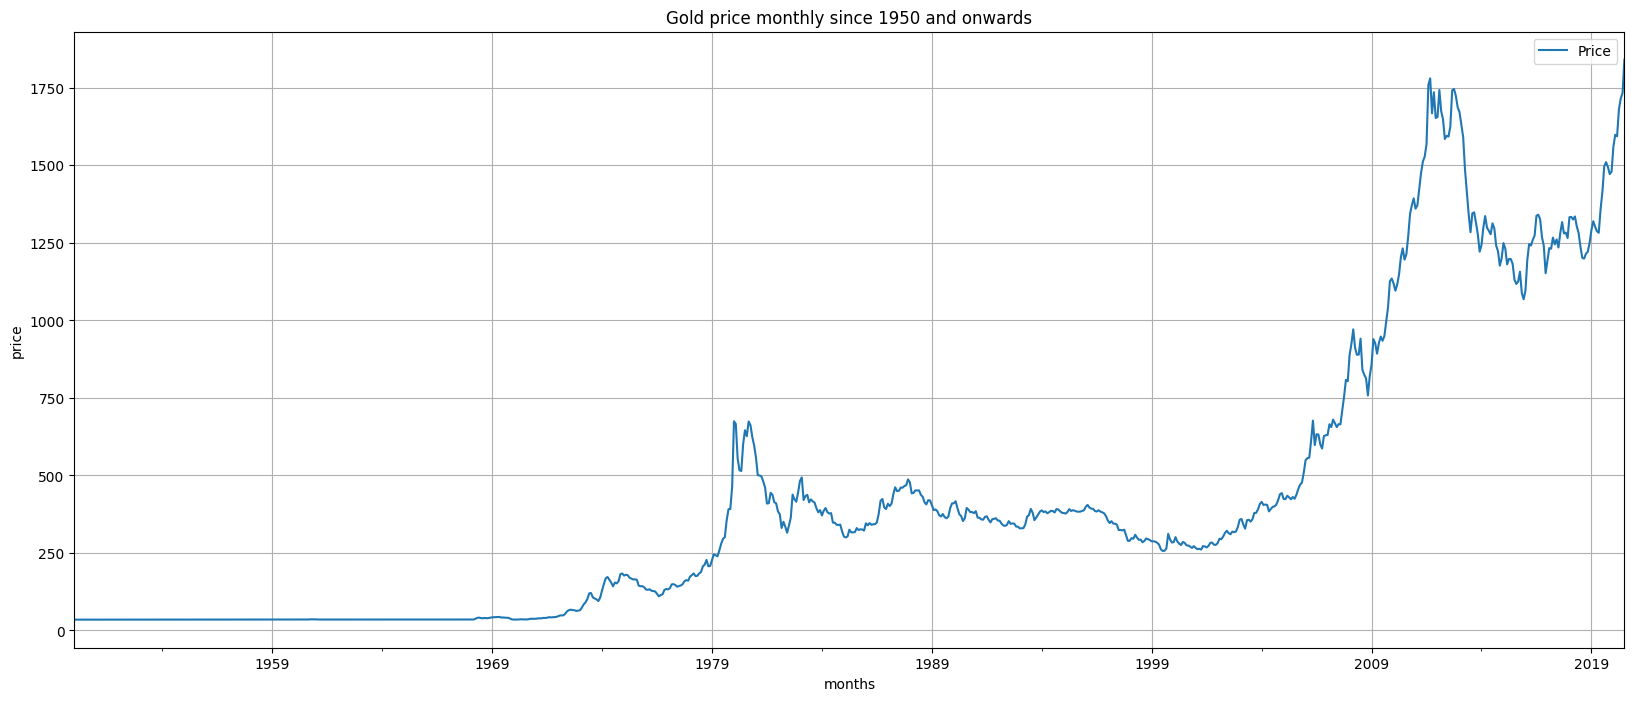

In [ ]:
df.plot(figsize=(20,8))
plt.title("Gold price monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

In [ ]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


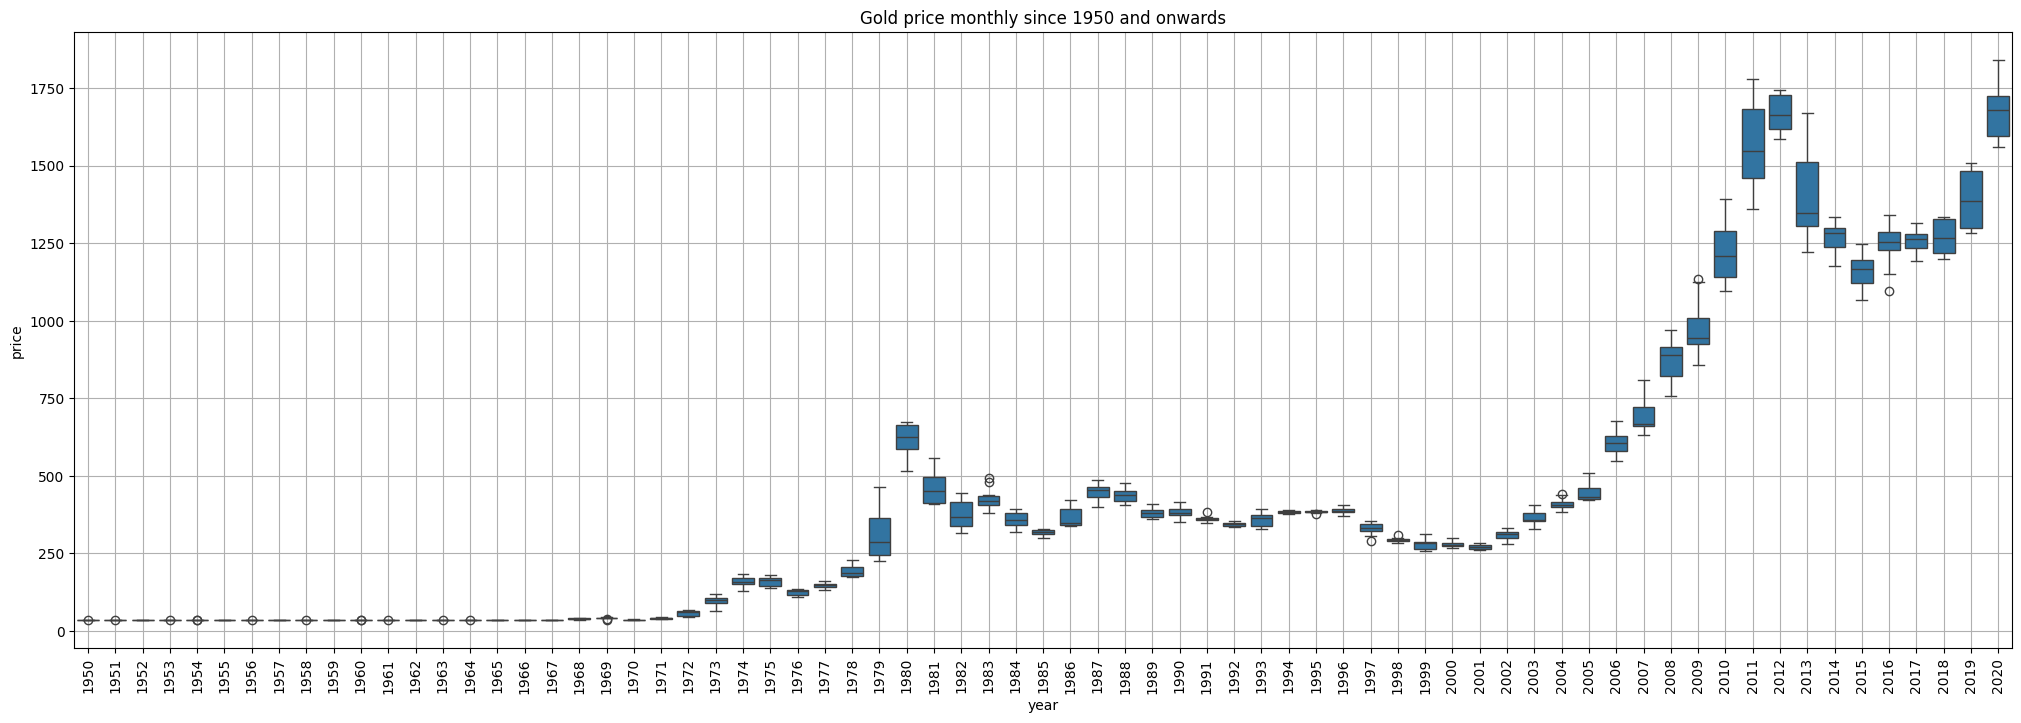

In [ ]:
__, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title("Gold price monthly since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid()

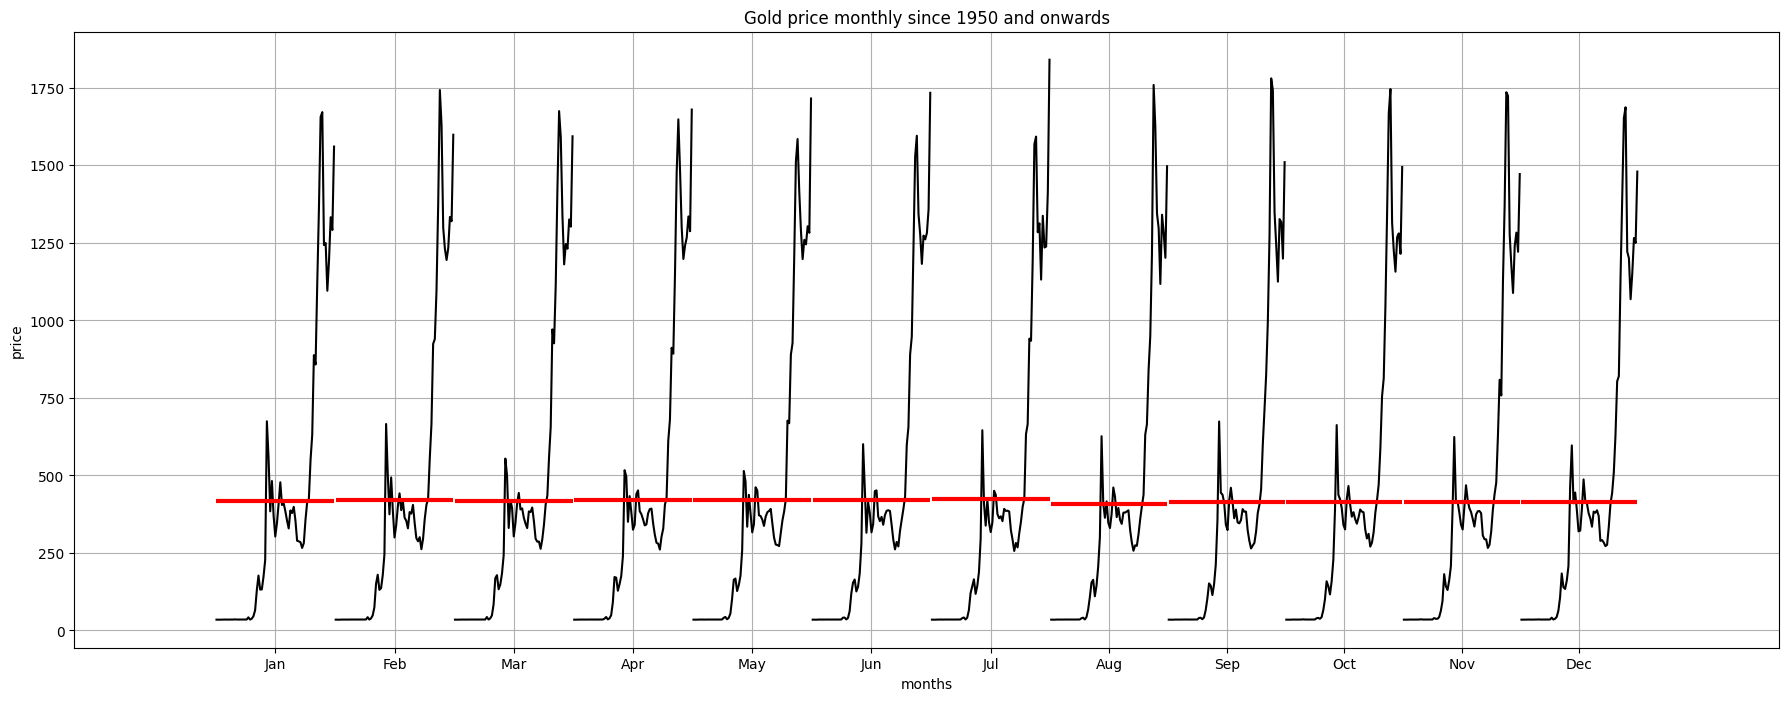

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax= plt.subplots(figsize=(22,8))
month_plot(df,ax=ax)
plt.title("Gold price monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

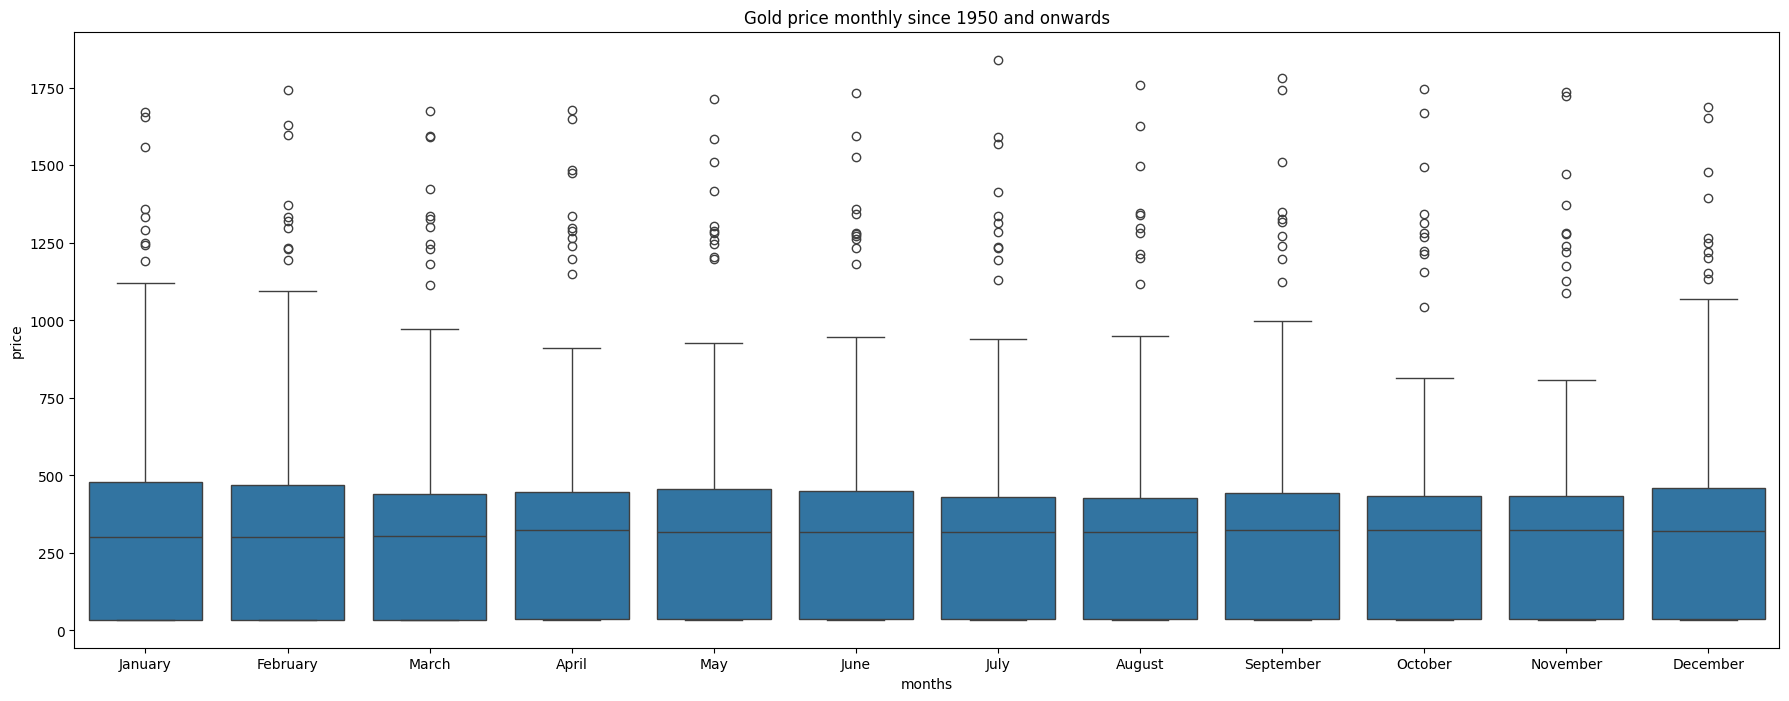

In [ ]:
_, ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y =df.values[:,0],ax=ax)
plt.title("Gold price monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.show()

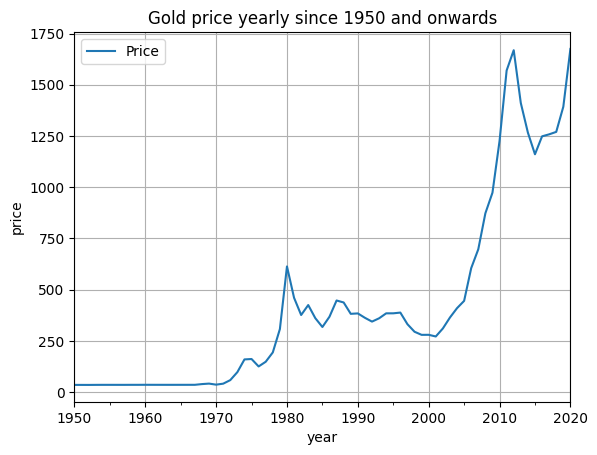

In [ ]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Gold price yearly since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("price")
plt.grid()

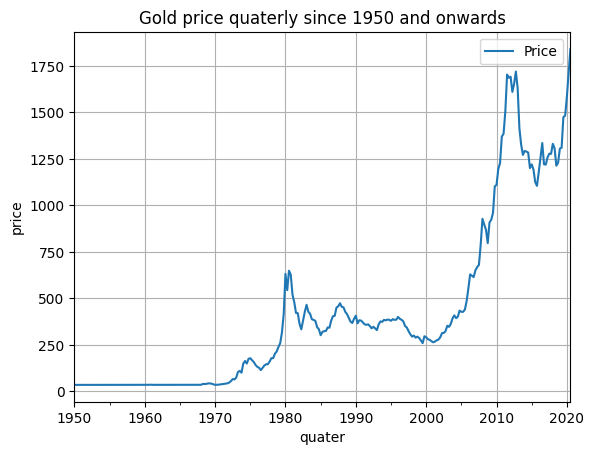

In [ ]:
df_quaterly_sum=df.resample('Q').mean()
df_quaterly_sum.plot();
plt.title("Gold price quaterly since 1950 and onwards")
plt.xlabel("quater")
plt.ylabel("price")
plt.grid()


In [ ]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


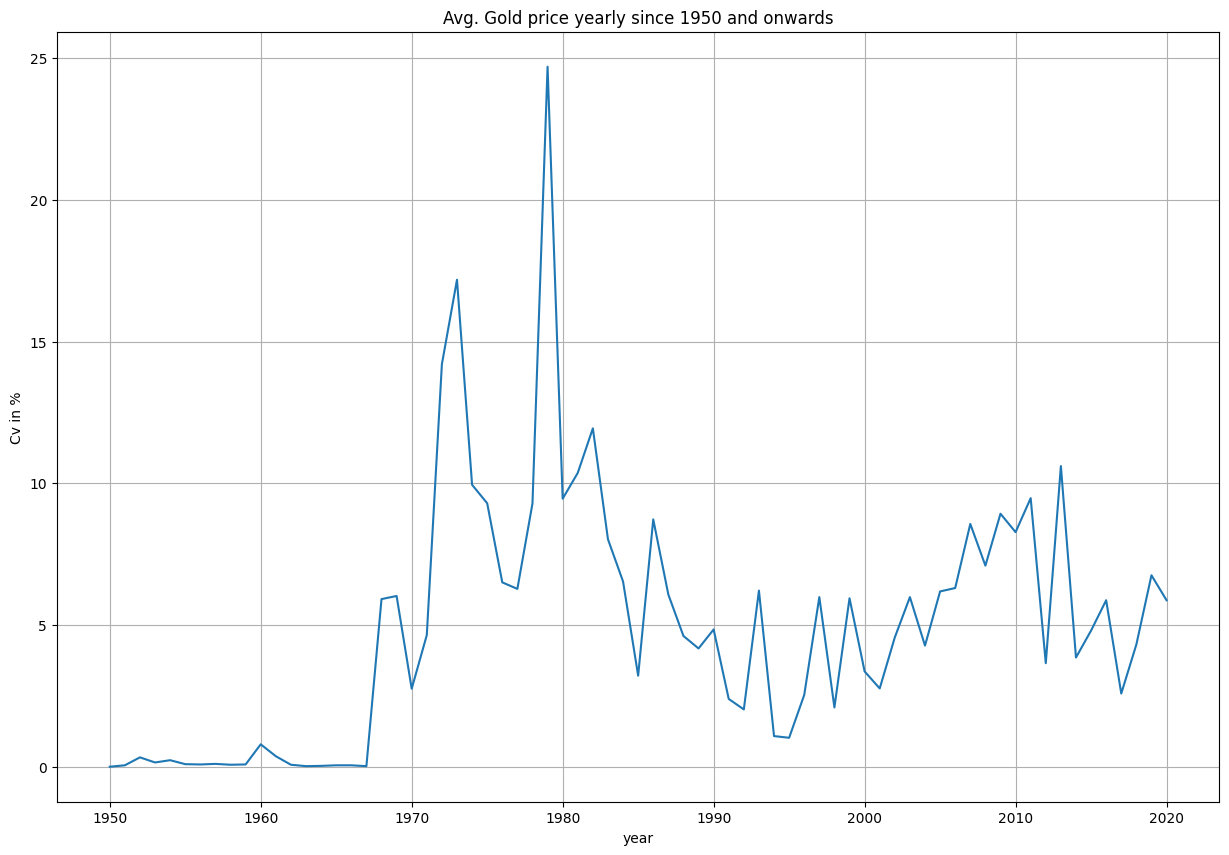

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title("Avg. Gold price yearly since 1950 and onwards")
plt.xlabel("year")
plt.ylabel("Cv in %")
plt.grid()

Time Series Forcasting

In [ ]:
train=df[df.index.year<=2015]
test = df[df.index.year>2015]

In [ ]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


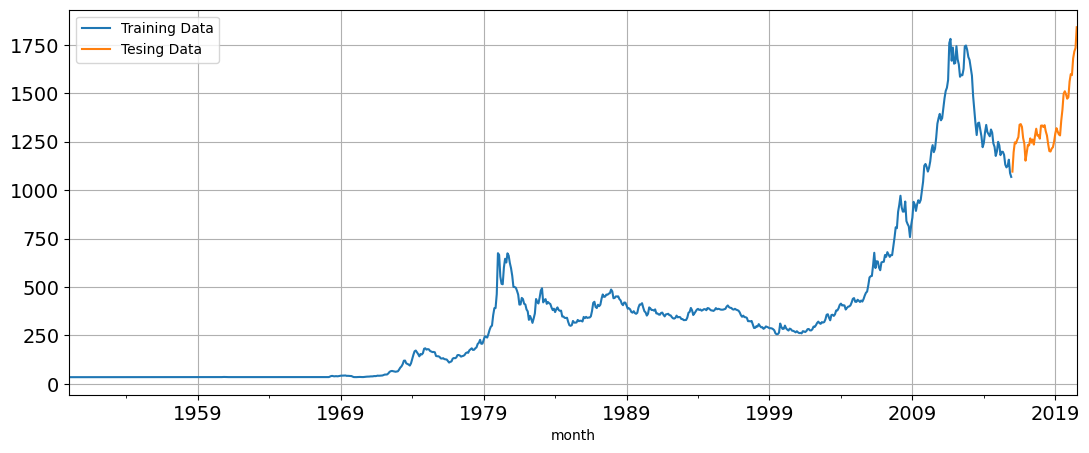

In [ ]:
train["Price"].plot(figsize=(13,5),fontsize=14)
test["Price"].plot(figsize=(13,5),fontsize=14)
plt.grid()
plt.legend(["Training Data","Tesing Data"])
plt.show()

Linear Regression

In [ ]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [ ]:
LR_train=train.copy()
LR_test=test.copy()

In [ ]:
LR_train['time']=train_time
LR_test['time']=test_time

In [ ]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

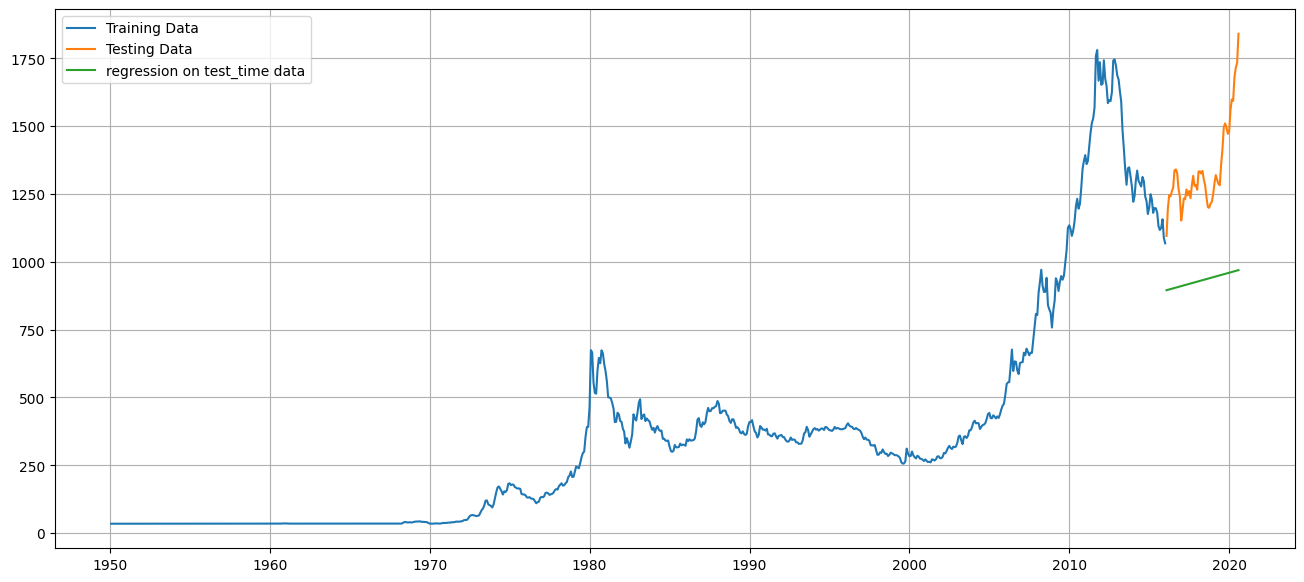

In [ ]:
test_predictions_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_predictions_model1
plt.figure(figsize=(16,7))
plt.plot(train["Price"],label="Training Data")
plt.plot(test["Price"],label="Testing Data")
plt.plot(LR_test['forecast'],label='regression on test_time data')
plt.legend(loc="best")
plt.grid()

In [ ]:
def mape(actual,pred):
  return round((np.mean(abs(actual-pred)/actual))*100,2)

In [ ]:
mape_model1_test=mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [ ]:
results=pd.DataFrame({'Test Mape (%)' : [mape_model1_test]},index=['Linear Regression'])
results

,Test Mape (%)
Linear Regression,29.76


In [ ]:
Naive_train=train.copy()
Naive_test=test.copy()
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

,naive
month,
2016-01-31,1068.317
2016-02-29,1068.317
2016-03-31,1068.317
2016-04-30,1068.317
2016-05-31,1068.317


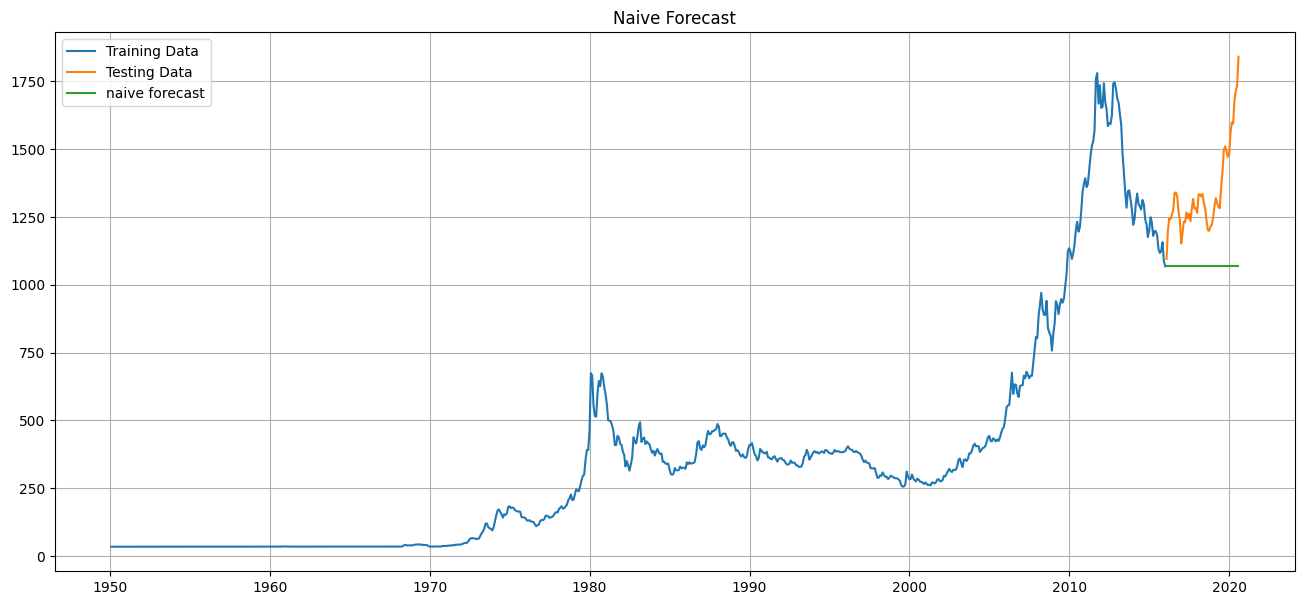

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train["Price"],label="Training Data")
plt.plot(test["Price"],label="Testing Data")
plt.plot(Naive_test['naive'],label='naive forecast')
plt.legend(loc="best")
plt.title("Naive Forecast")
plt.grid()

In [ ]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print("MAPE is %3.3f"%(mape_model2_test),"%")

MAPE is 19.380 %


In [ ]:
resultDf_2 =pd.DataFrame({'Test MAPE (%)' : [mape_model2_test]},index=['Naive Forecast'])
results=pd.concat([results,resultDf_2])
results

,Test Mape (%),Test MAPE (%)
Linear Regression,29.76,NaN
Naive Forecast,19.38,NaN
Naive Forecast,NaN,19.38
Naive Forecast,NaN,19.38
Naive Forecast,NaN,19.38


In [ ]:
final_model=ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal='additive').fit(smoothing_level=0.4,
                                                          smoothing_trend=0.3,
                                                          smoothing_seasonal=0.6)

In [ ]:
MAPE_final_model=mape(df['Price'].values,final_model.fittedvalues)
print("MAPE : ", MAPE_final_model)

MAPE :  17.24


In [ ]:
predictions=final_model.forecast(steps=len(test))


In [ ]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model.resid,ddof=1),
                     'prediction':prediction,
                     'upper_CI':prediction + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


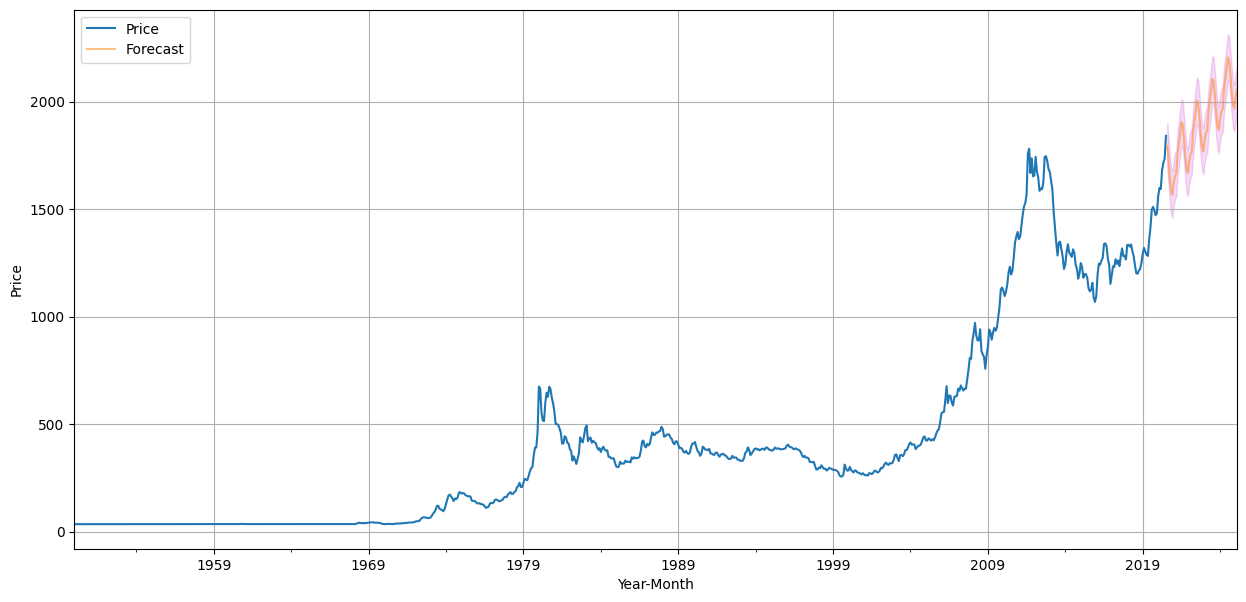

In [ ]:
axis=df.plot(label='Actual',figsize=(15,7))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.15)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()